# Red Wine Quality Prediction Project

Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 


Problem statement:- Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
# Installing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Importing dataset from git hub
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(1599, 12)

There are total 1599 columns and 12 rows present in the dataset

In [4]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [3]:
# Checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values are present

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Takeaways:
    1. There are total 1599 entries and 12 columns
    2. No null values present
    3. Our label value i.e. quality is of integer datatype
    4. All other columns are of float datatype.

In [4]:
# Names of columns
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the feature columns are of float datatype whereas 
label column is of integer datatype

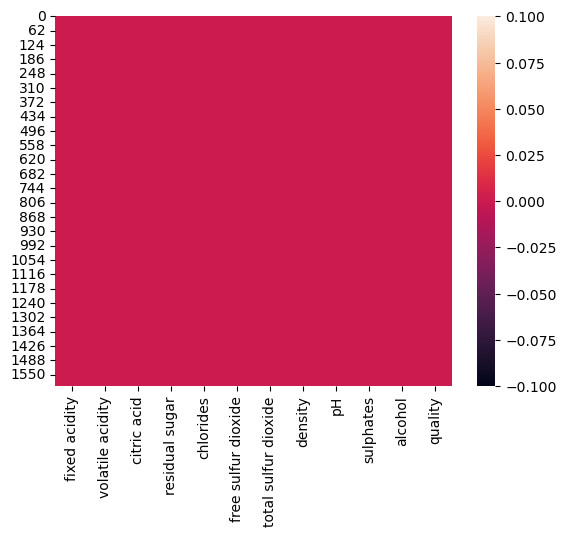

In [5]:
# Chceking null values on heatmap
sns.heatmap(df.isnull())
plt.show()

No null values present

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# To check the number of unique values in label column
df['quality'].nunique()

6

In [8]:
# To check the unique values in the la
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Takeaway:-
    1. The count for all the columns is 1599 which means there is no missing value.
    2. Since in fixed acidity, critic acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphate, alcohol mean is greater than median(50%), which means data is right skwed in these columns.
    3. Where as in rest columns mean is greater than median but not signicant difference is there. So the data is normally distributed in them.
    4. In residual sugar, free sulfur dioxide & total sulfur dioxide there is significant difference between 75% and max values which shows that outliers are present.

# Data Visualisation

Uniavriate Analysis

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

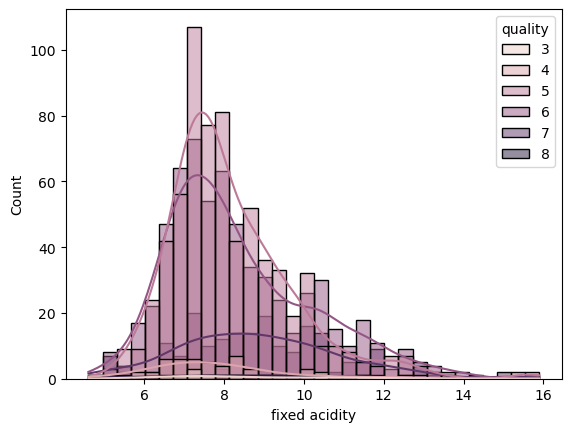

In [16]:
sns.histplot(data=df, x='fixed acidity', kde=True, hue='quality')

The data has been normally distributed in fixed acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

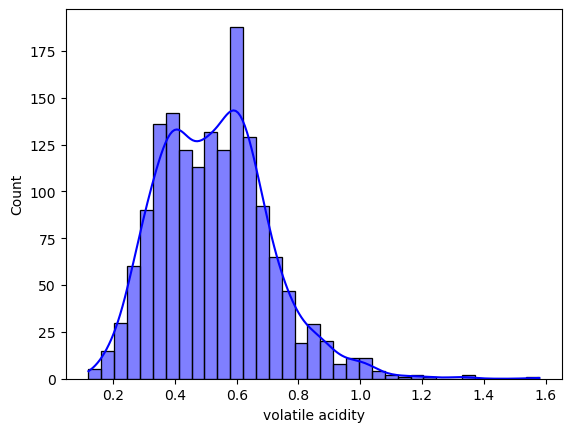

In [17]:
sns.histplot(data=df, x='volatile acidity', color='blue', kde=True)

The data has been normally distributed in volatile acidity

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

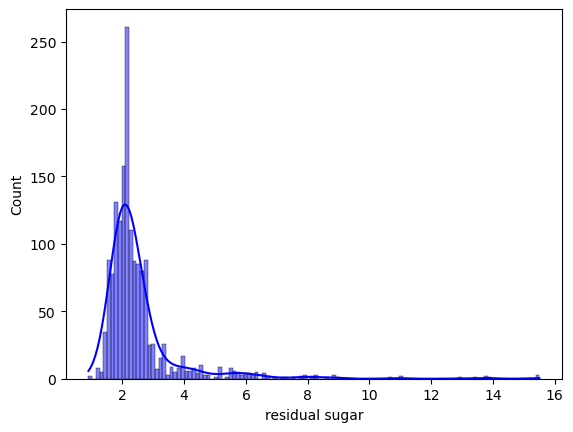

In [18]:
sns.histplot(data=df, x='residual sugar', color='blue', kde=True)

The data is right skwed.

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

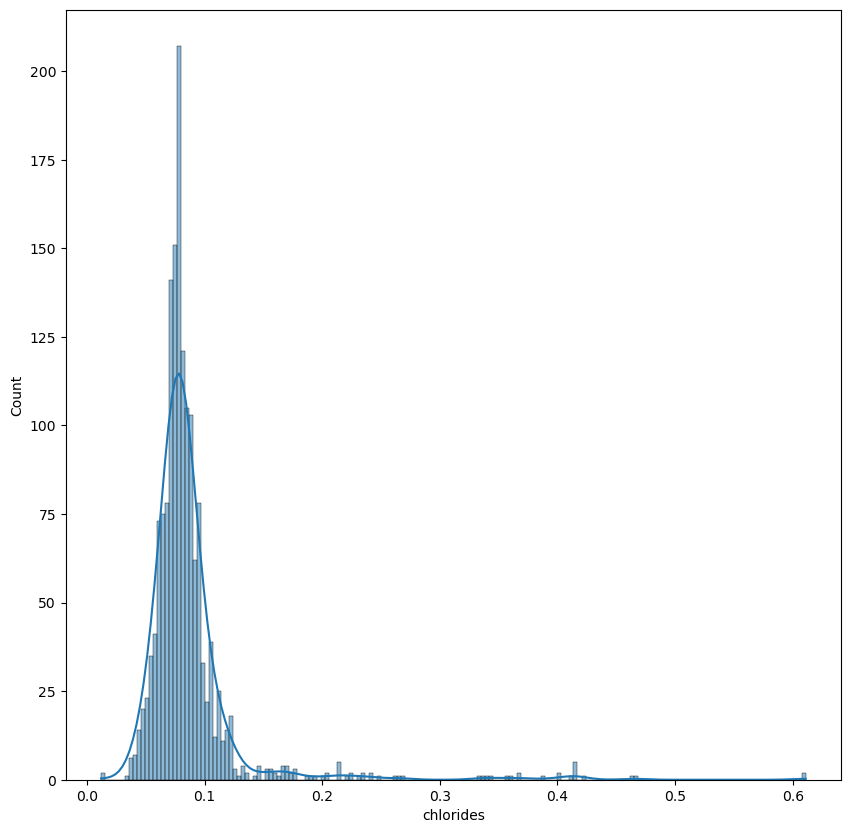

In [19]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='chlorides', kde='True')

The data is right skwed

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

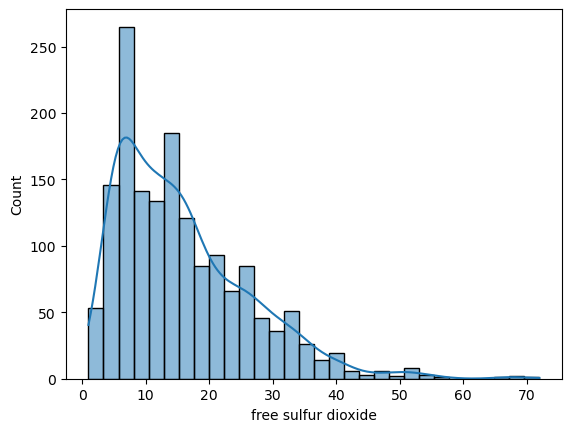

In [20]:
sns.histplot(data=df, x='free sulfur dioxide', kde='True')

The data is right skwed.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

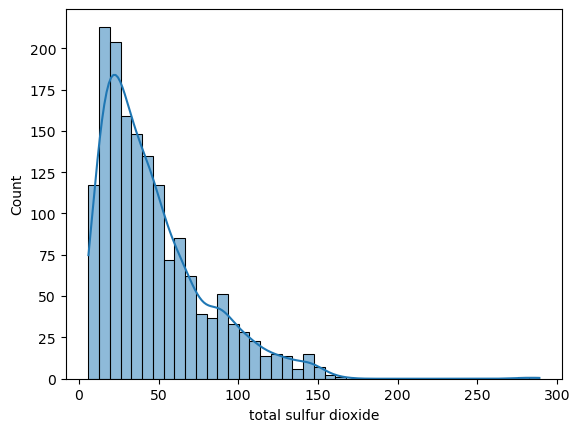

In [21]:
sns.histplot(data=df, x='total sulfur dioxide', kde='True')

The data is right skwed.

<AxesSubplot:xlabel='density', ylabel='Count'>

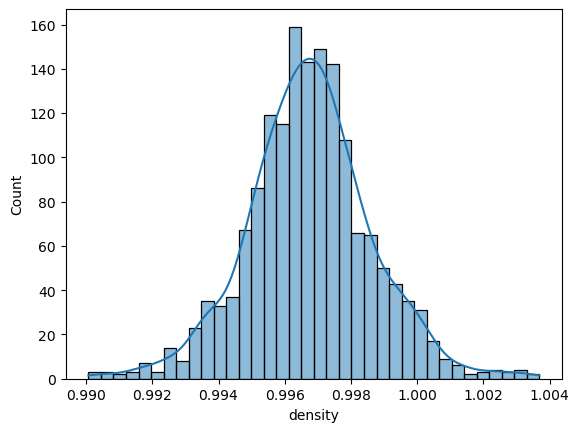

In [22]:
sns.histplot(data=df, x='density', kde='True')

The data has been distributed normally 

<AxesSubplot:xlabel='pH', ylabel='Count'>

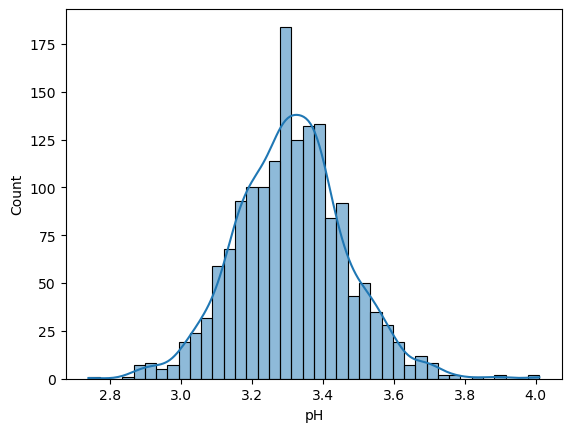

In [23]:
sns.histplot(data=df, x='pH', kde='True')

The data has been distributed normally

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

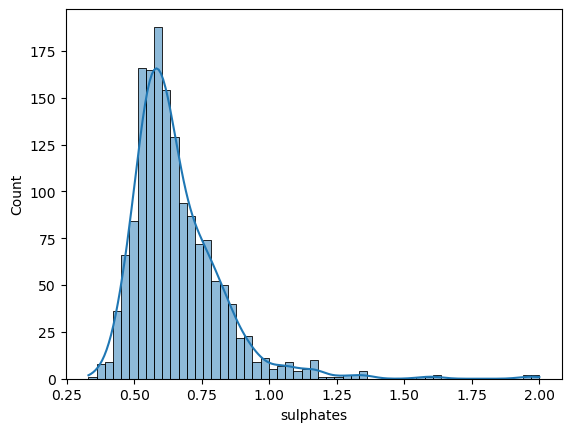

In [24]:
sns.histplot(data=df, x='sulphates', kde='True')

The data has been right skwed.

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

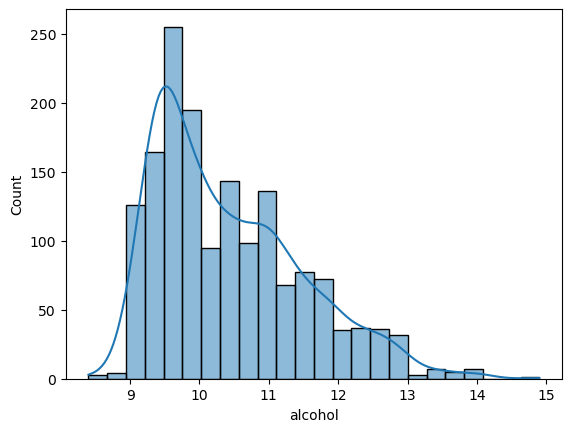

In [25]:
sns.histplot(data=df, x='alcohol', kde='True')

Bivariate Analysis

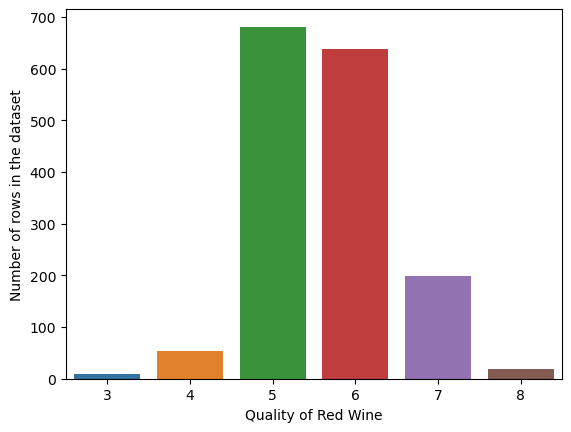

In [26]:
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Number of rows in the dataset')
plt.show()

Majority of the wine has got 5 & 6 in quality

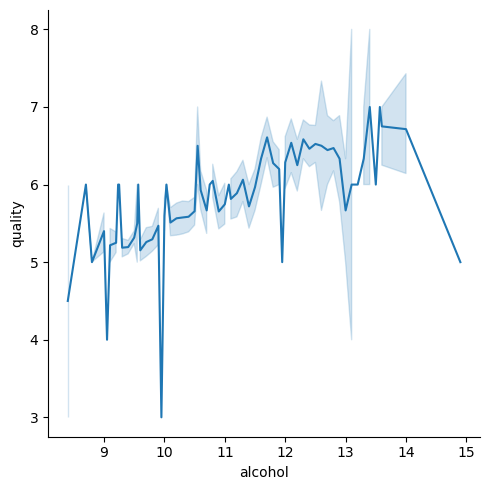

In [9]:
sns.relplot(data=df, x="alcohol", y="quality", kind="line")

No such relationship between alcohol and quality

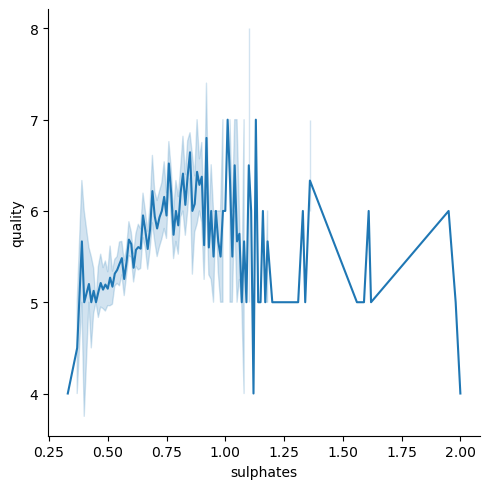

In [28]:
sns.relplot(data=df, x="sulphates", y="quality", kind="line")

No such relationship between sulphates and quality

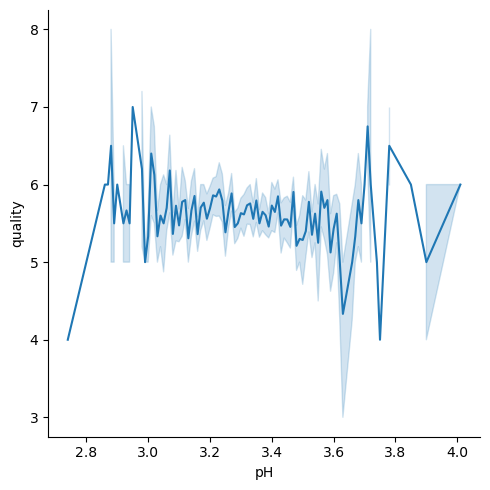

In [29]:
sns.relplot(data=df, x="pH", y="quality", kind="line")

No such relationship between pH and quality

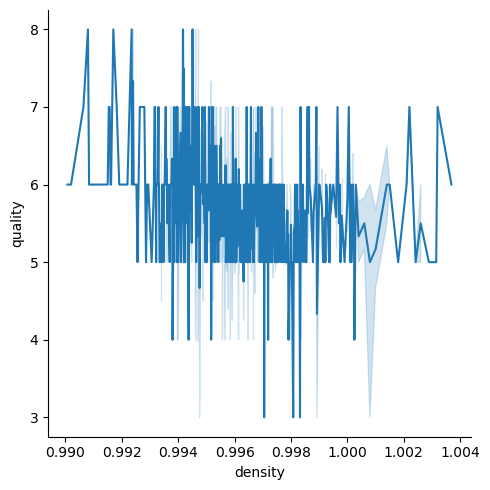

In [30]:
sns.relplot(data=df, x="density", y="quality", kind="line")

No such relationship between density and quality

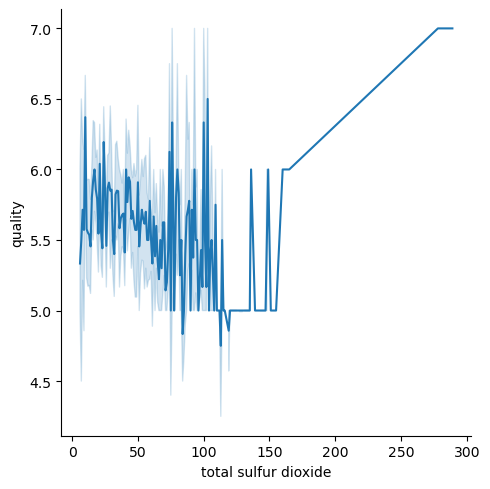

In [31]:
sns.relplot(data=df, x="total sulfur dioxide", y="quality", kind="line")

No such relationship between total sulfur dioxide and quality

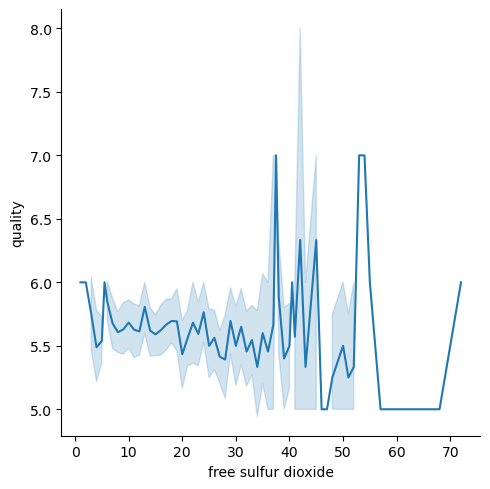

In [32]:
sns.relplot(data=df, x="free sulfur dioxide", y="quality", kind="line")

No such relationship between free sulfur dioxide and quality

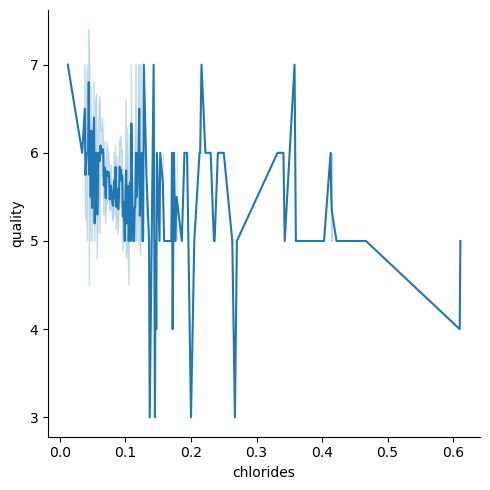

In [33]:
sns.relplot(data=df, x="chlorides", y="quality", kind="line")

No such relationship between chlorides and quality

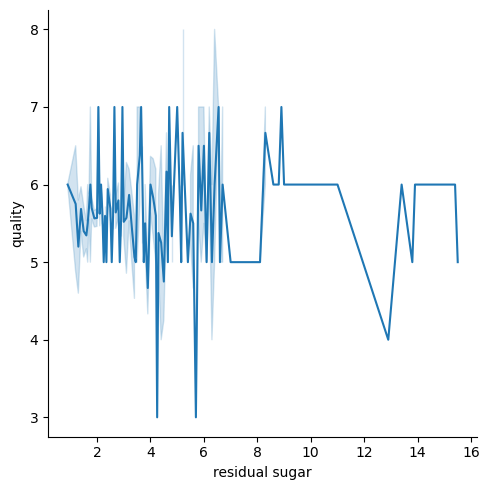

In [34]:
sns.relplot(data=df, x="residual sugar", y="quality", kind="line")

No such relationship between residual sugar and quality

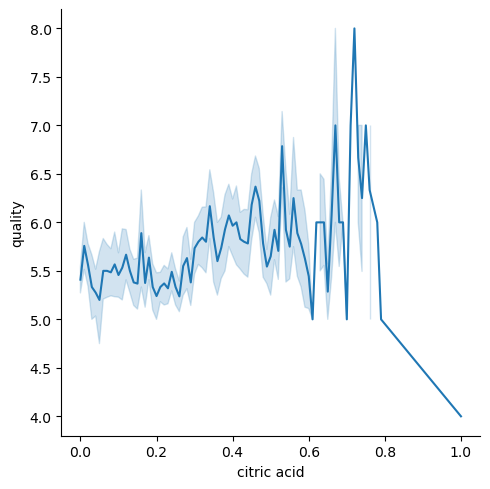

In [35]:
sns.relplot(data=df, x="citric acid", y="quality", kind="line")

No such relationship between citric acid and quality

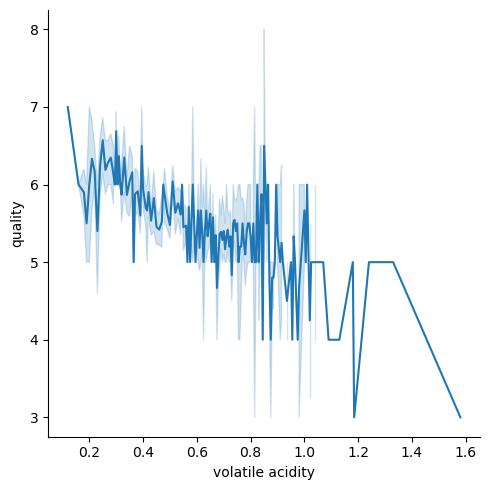

In [36]:
sns.relplot(data=df, x="volatile acidity", y="quality", kind="line")

No such relationship between volatile acidity and quality

Univariate analysis

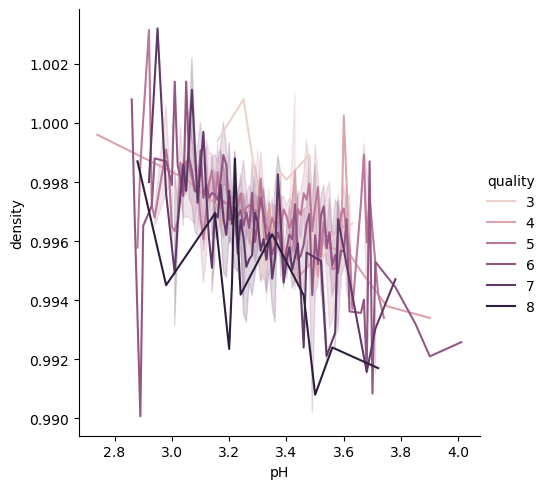

In [37]:
sns.relplot(data=df, kind="line", x="pH", y="density", hue="quality")

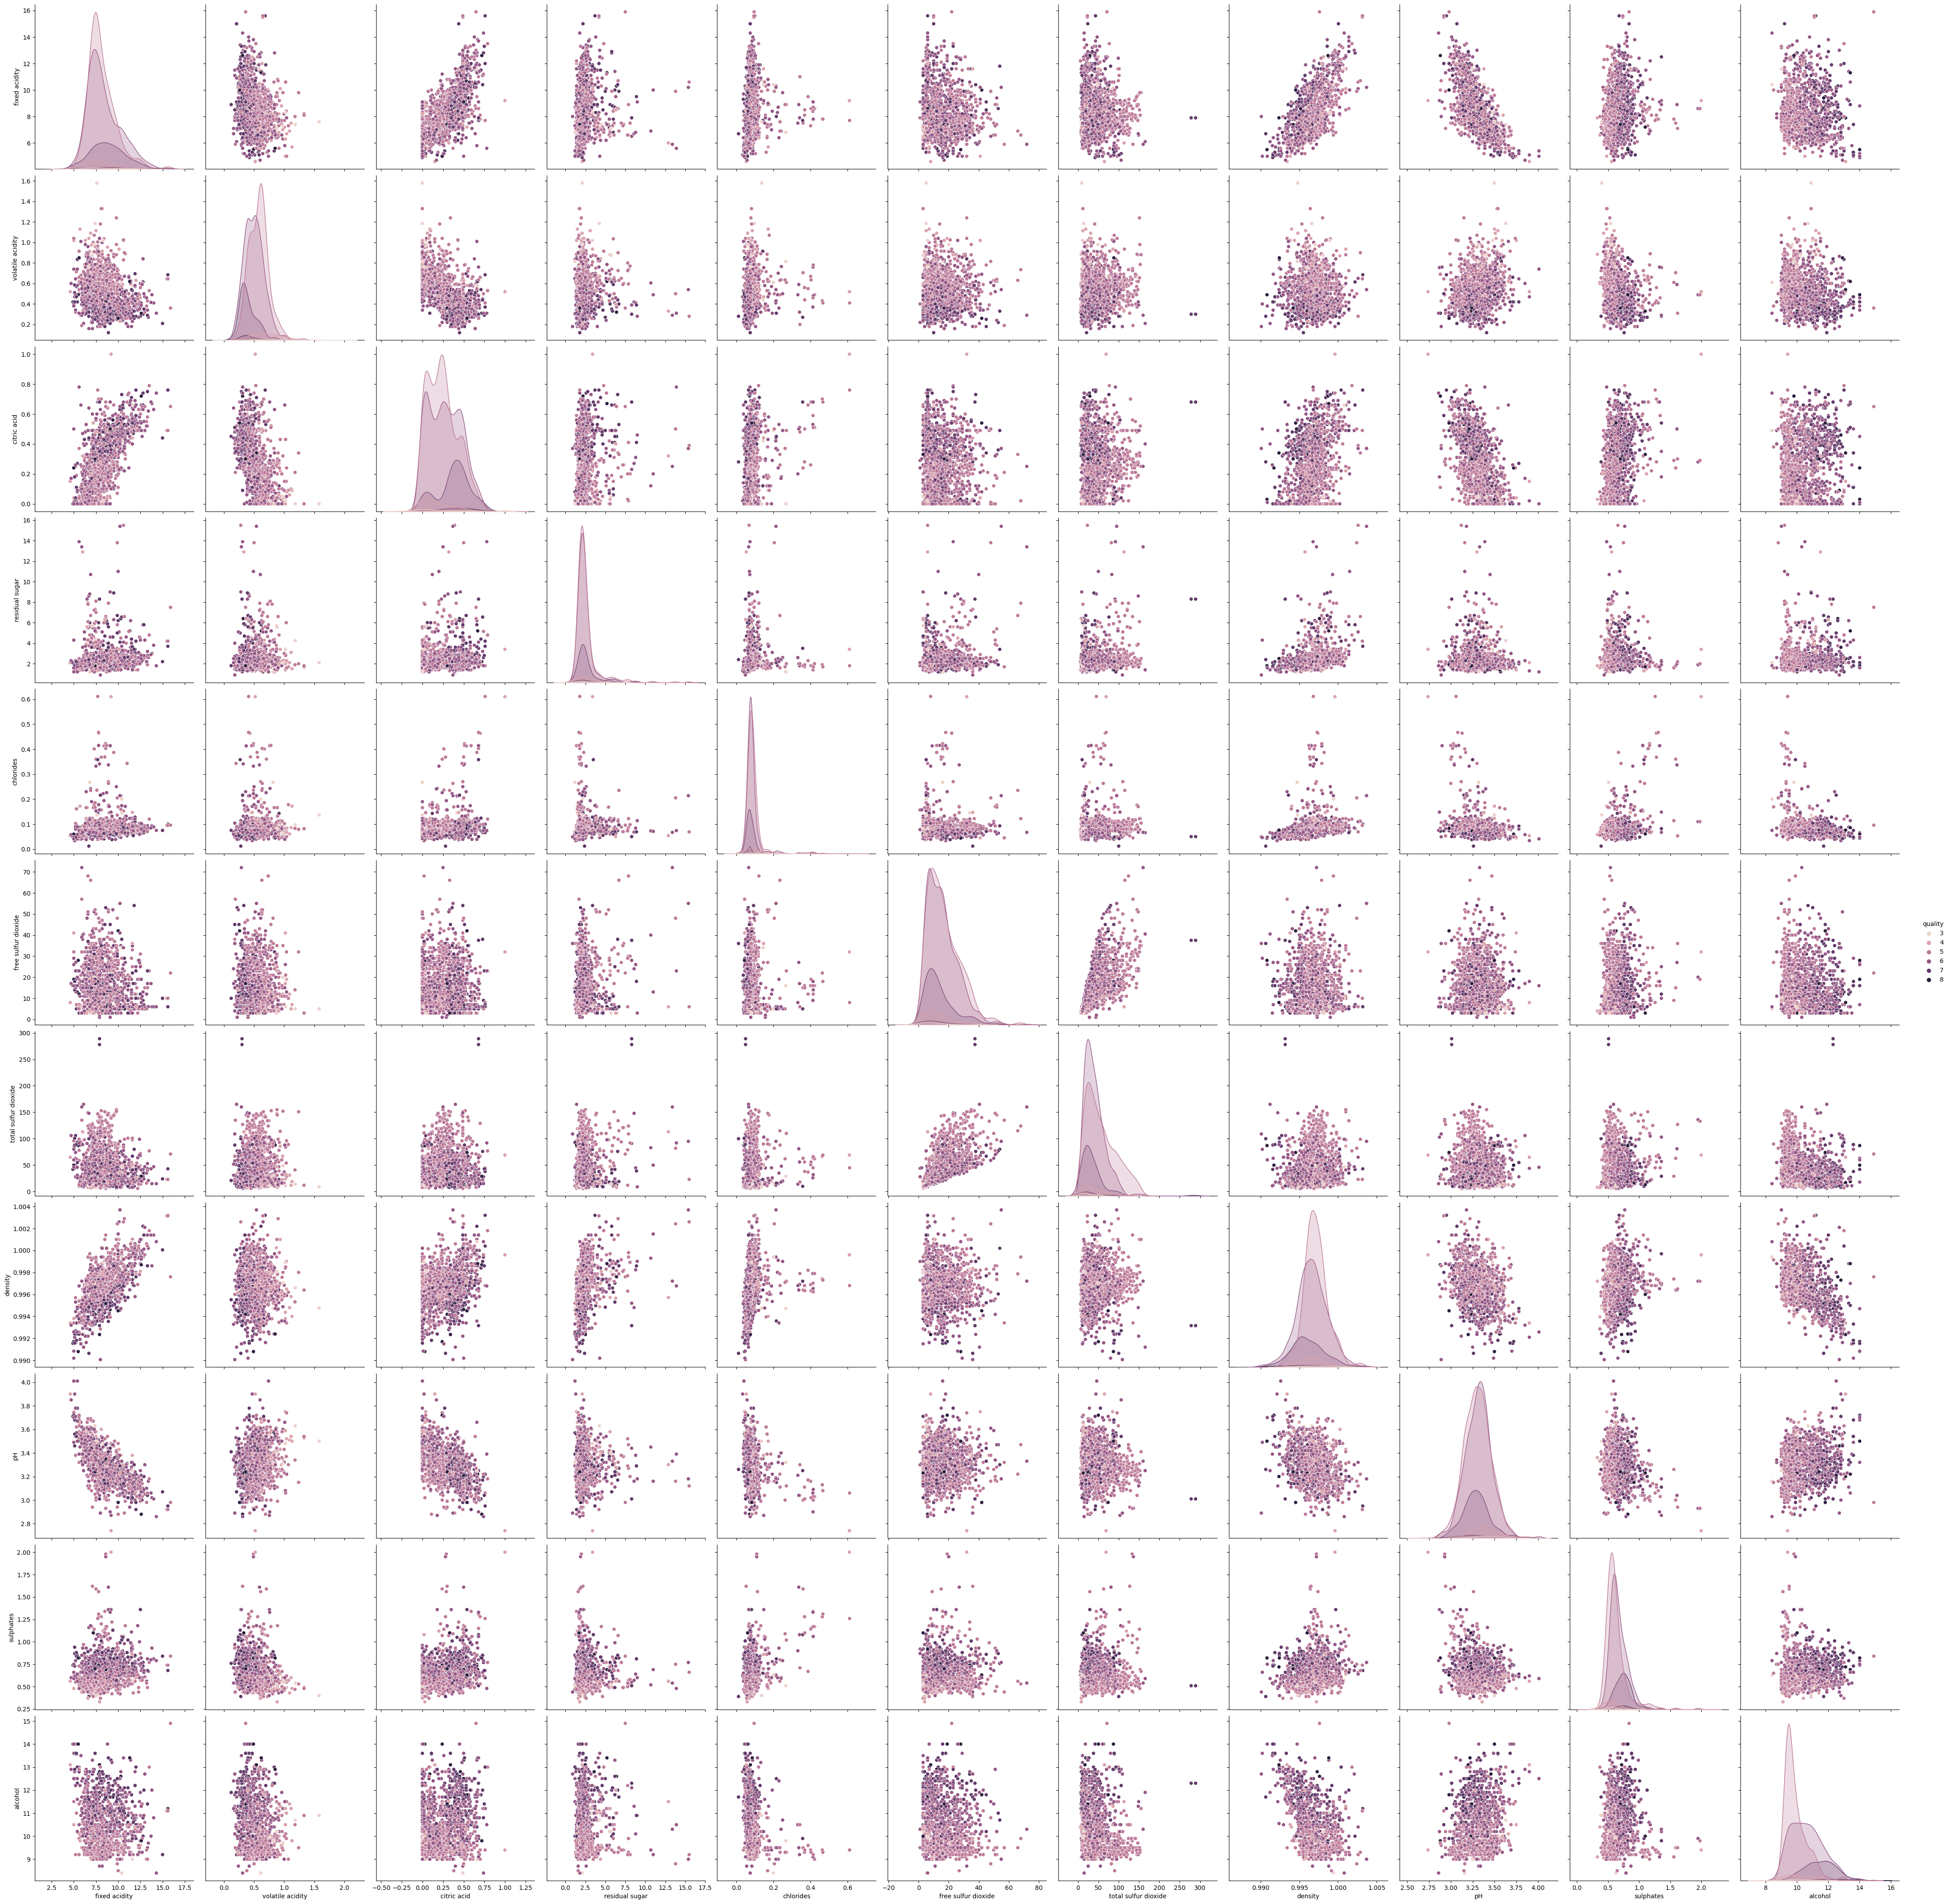

In [38]:
sns.pairplot(df, hue='quality',height=4)

In [10]:
# Checking the correlation
cor=df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

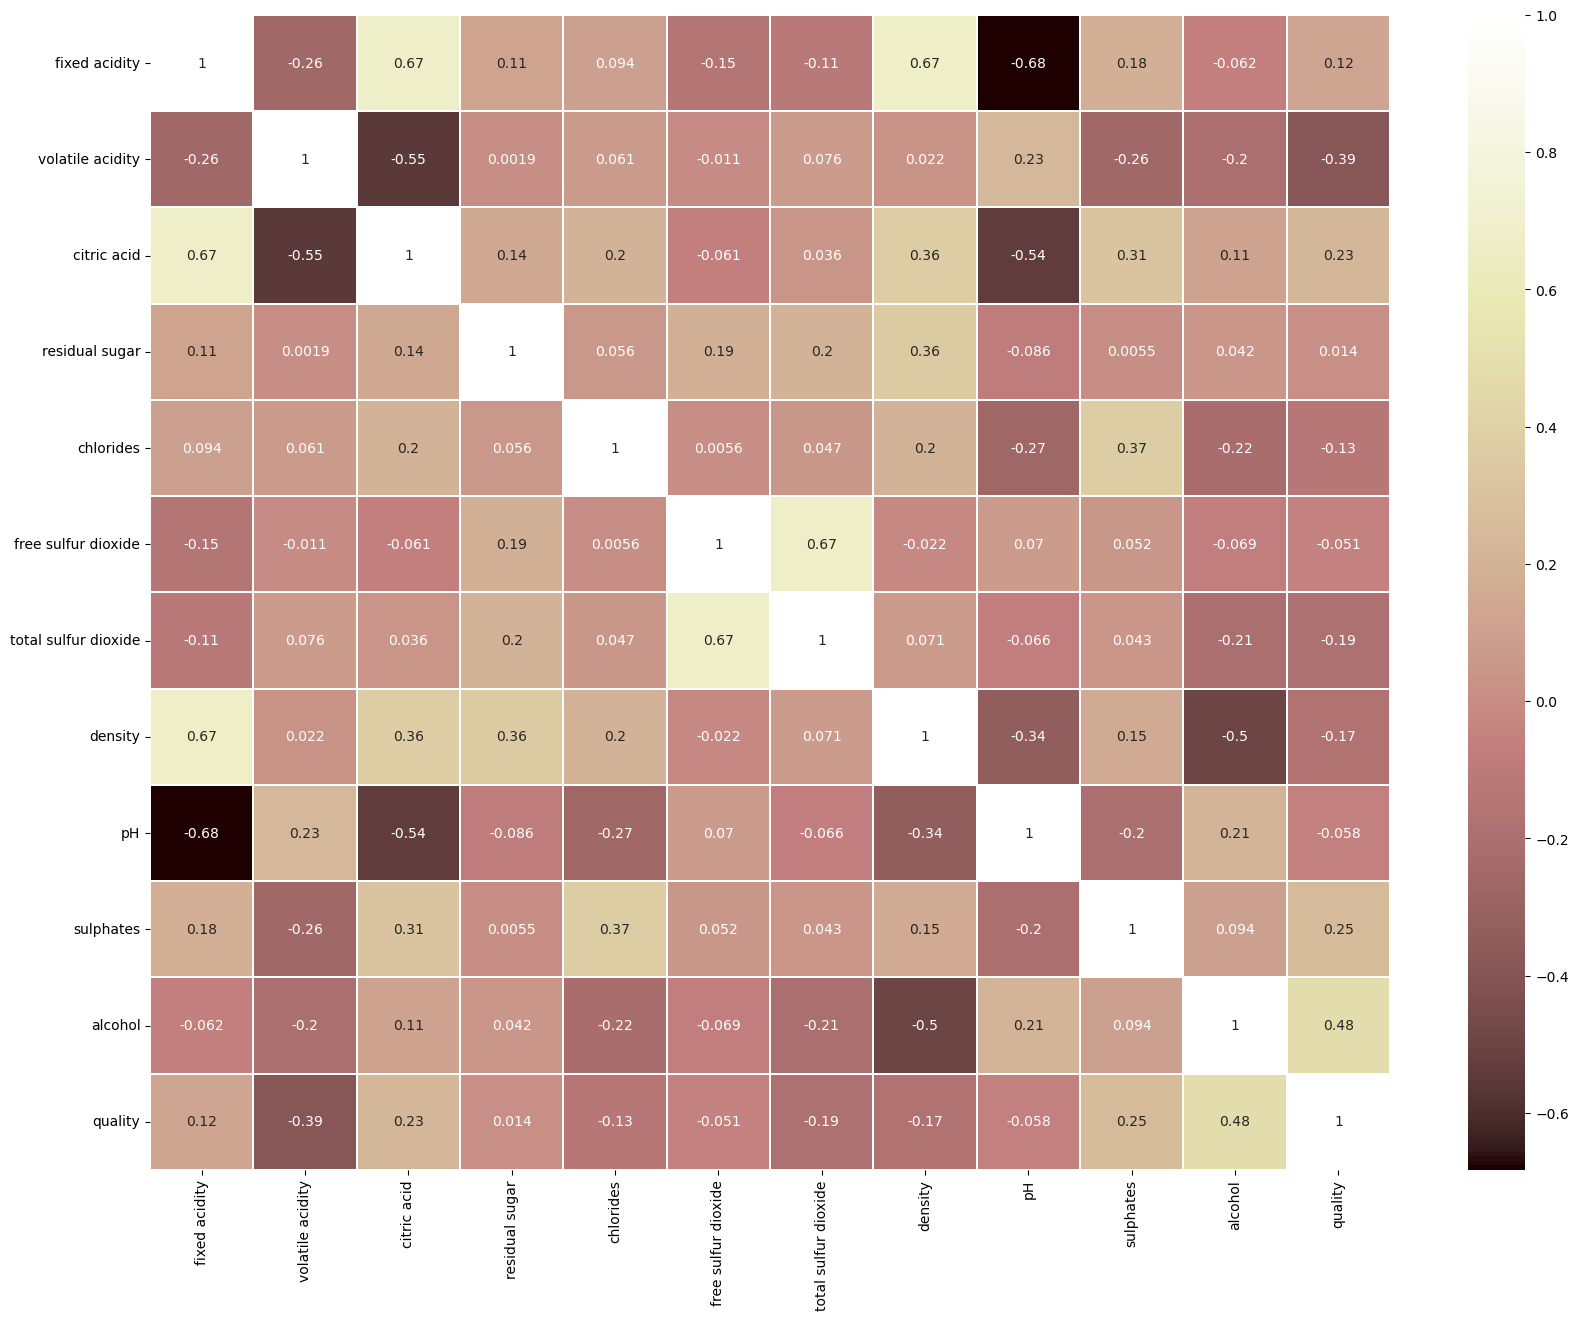

In [40]:
#To get visual representation of correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="pink", linewidths=0.1)
plt.show()

Takeaway:-
    1. quality have positive correlation with alcohol, sulphates, residual sugar,fixed acidity & critic acid.
    2. Quality have negative correlation with pH, density, total sulfur dioxide, free sulfur dioxide, chlorides & volatile acidity.
    3. pH and fixed acidity are higly negative correlated. Critic acid and pH are also negatively correlated

In [11]:
# Correlation with label
df_corr=cor['quality'].sort_values(ascending=False)
df_corr

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [12]:
# Checking skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sufur dioxide, sulphates & alocohol have skewness.

In [43]:
#removing skewness
skew=["fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "sulphates", "alcohol"]
df[skew]=np.cbrt(df[skew])
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

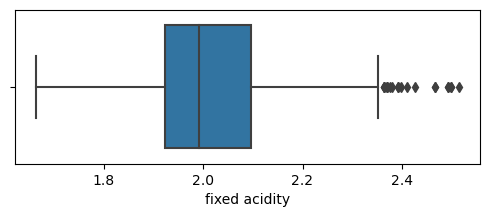

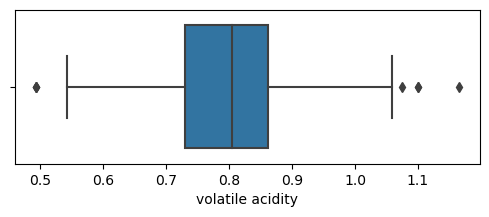

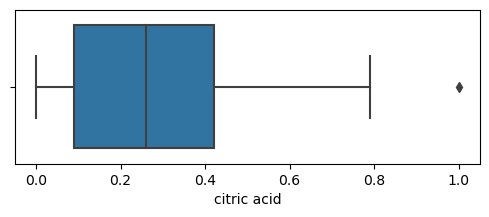

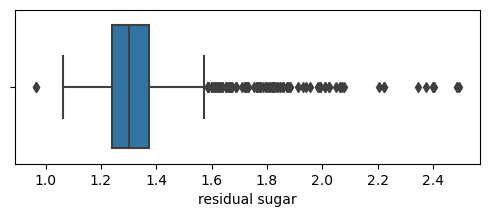

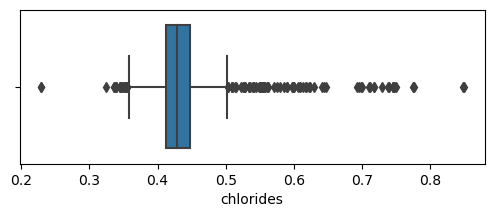

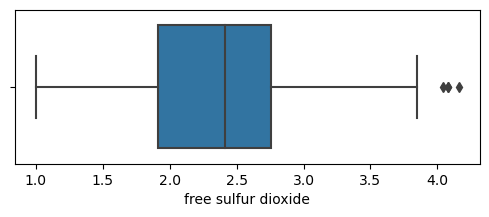

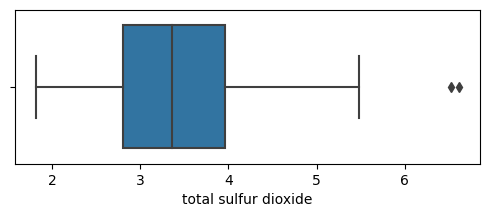

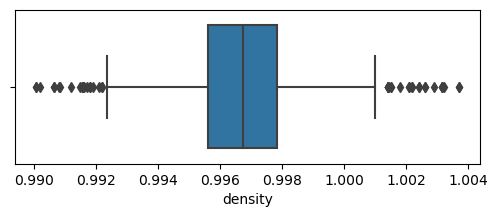

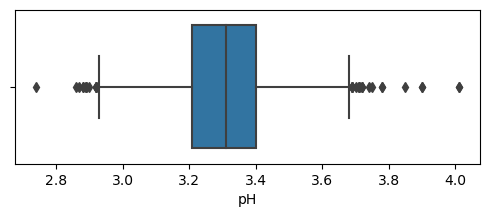

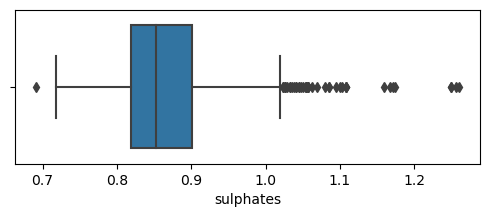

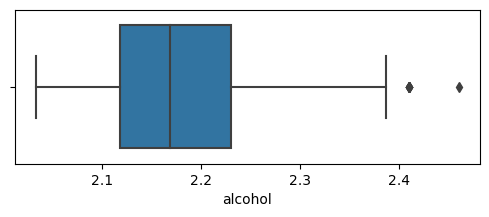

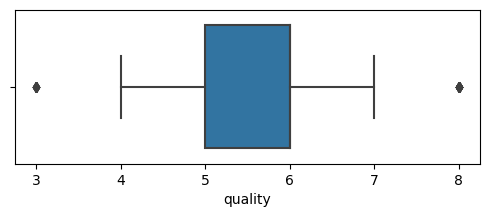

In [44]:
#detecting outliers using box plot
for i in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(df[i], data=df)
    plt.show()

Enough amount of outliers are present in all the columns

In [45]:
#treating outliers using zscore
from scipy.stats import zscore
new=np.abs(zscore(df))
threshold=3
np.where(new>3)

df=df[(new<3).all(axis=1)]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.948695          0.887904         0.00        1.238562   0.423582   
1          1.983192          0.958284         0.00        1.375069   0.461044   
2          1.983192          0.912581         0.04        1.320006   0.451436   
3          2.237378          0.654213         0.56        1.238562   0.421716   
4          1.948695          0.887904         0.00        1.238562   0.423582   
...             ...               ...          ...             ...        ...   
1594       1.837091          0.843433         0.08        1.259921   0.448140   
1595       1.806969          0.819321         0.10        1.300591   0.395789   
1596       1.846915          0.798957         0.13        1.320006   0.423582   
1597       1.806969          0.864012         0.12        1.259921   0.421716   
1598       1.817121          0.676790         0.47        1.532619   0.406155   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.223980              3.239612  0.99780  3.51   0.824257   
1                2.924018              4.061548  0.99680  3.20   0.879366   
2                2.466212              3.779763  0.99700  3.26   0.866239   
3                2.571282              3.914868  0.99800  3.16   0.833955   
4                2.223980              3.239612  0.99780  3.51   0.824257   
...                   ...                   ...      ...   ...        ...   
1594             3.174802              3.530348  0.99490  3.45   0.833955   
1595             3.391211              3.708430  0.99512  3.52   0.912581   
1596             3.072317              3.419952  0.99574  3.42   0.908560   
1597             3.174802              3.530348  0.99547  3.57   0.892112   
1598             2.620741              3.476027  0.99549  3.39   0.870659   

       alcohol  quality  
0     2.110454        5  
1     2.139975        5  
2     2.139975        5  
3     2.139975        6  
4     2.110454        5  
...        ...      ...  
1594  2.189760        5  
1595  2.237378        6  
1596  2.223980        6  
1597  2.168703        5  
1598  2.223980        6  

[1480 rows x 12 columns]

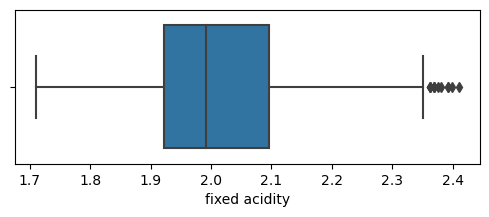

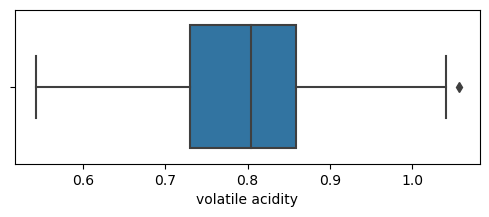

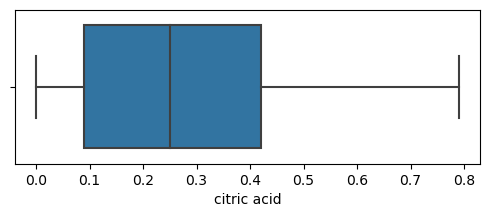

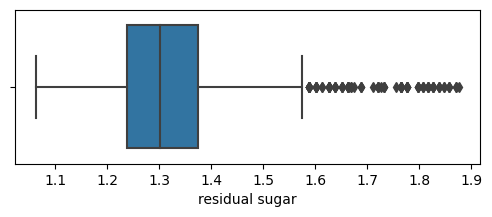

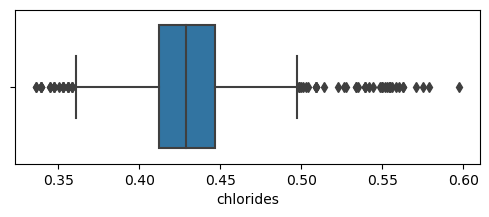

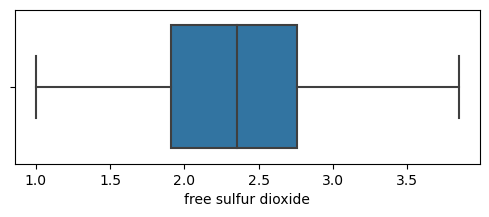

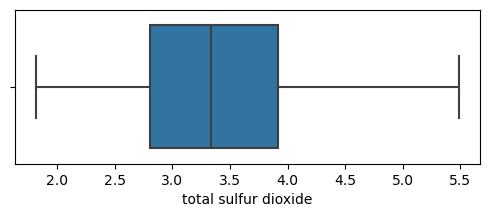

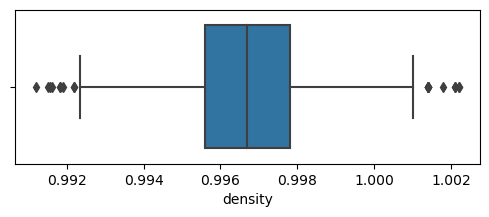

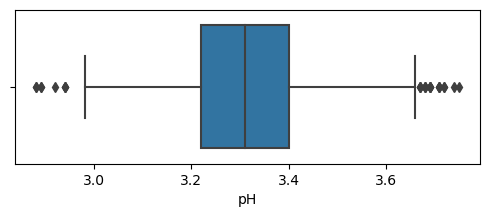

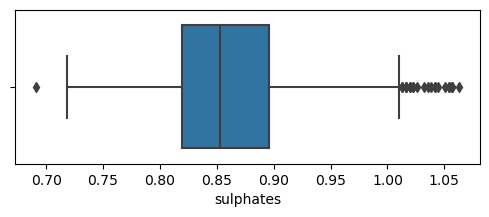

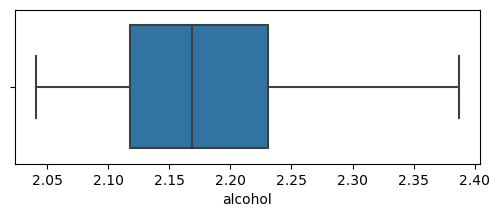

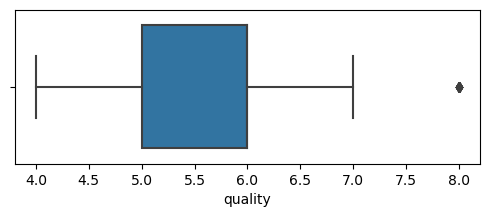

In [46]:
for i in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(df[i], data=df)
    plt.show()

In [47]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [48]:
#removing highly correlated columns using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif["feature"]=df.columns
vif

VIF values               feature
0    835.371041         fixed acidity
1    156.851269      volatile acidity
2      9.328932           citric acid
3    110.092861        residual sugar
4    203.538016             chlorides
5     55.962224   free sulfur dioxide
6     58.636766  total sulfur dioxide
7   4599.890437               density
8   1273.393007                    pH
9    293.067240             sulphates
10  1554.583323               alcohol
11    86.345861               quality

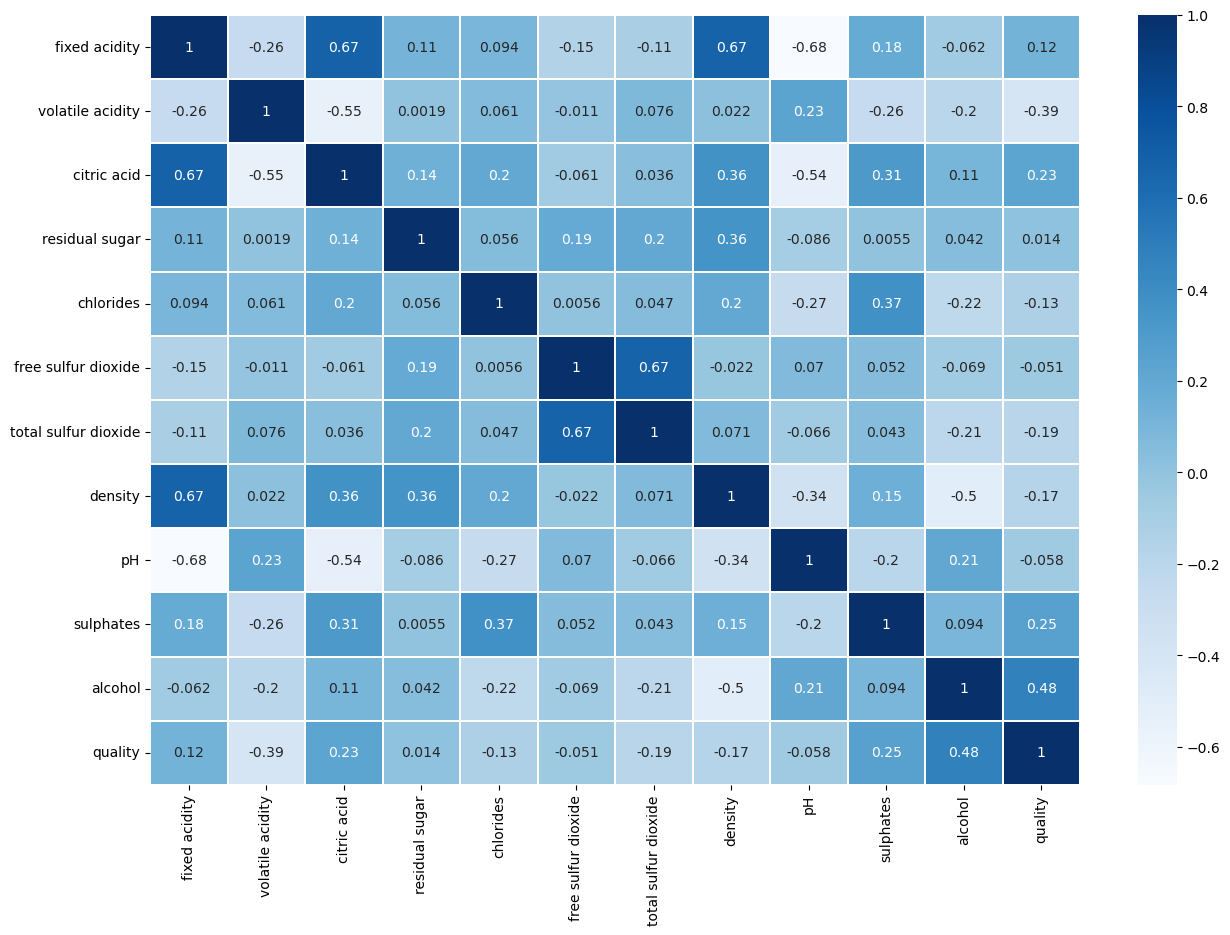

In [13]:
# Visual representation of correlation 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=0.3)
plt.show()

takeaway:-
    1. Quality is positively related with alcohol, sulphates, residual sugar, citric acid and fixed acidity.
    2. Quality is negatively related with pH, density, total sulfur dioxide, free sulfur dioxide, chlorides & volatile acidity.
    3. From the above plot, we can summarise that pH & total sulfur dioxide are much rellated to our label i.e. quality. We can drop them.

In [14]:
# Dropping pH & total sulfur dioxide
df=df.drop(['pH','total sulfur dioxide'], axis=1)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density  sulphates  alcohol  quality  
0                    11.0  0.99780       0.56      9.4        5  
1                    25.0  0.99680       0.68      9.8        5  
2                    15.0  0.99700       0.65      9.8        5  
3                    17.0  0.99800       0.58      9.8        6  
4                    11.0  0.99780       0.56      9.4        5  
...                   ...      ...        ...      ...      ...  
1594                 32.0  0.99490       0.58     10.5        5  
1595                 39.0  0.99512       0.76     11.2        6  
1596                 29.0  0.99574       0.75     11.0        6  
1597                 32.0  0.99547       0.71     10.2        5  
1598                 18.0  0.99549       0.66     11.0        6  

[1599 rows x 10 columns]

In [16]:
df['quality_final'] = np.where(df['quality'] >= 7, 1, 0)
df = df.drop(['quality'], axis = 1)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density  sulphates  alcohol  quality_final  
0                    11.0  0.99780       0.56      9.4              0  
1                    25.0  0.99680       0.68      9.8              0  
2                    15.0  0.99700       0.65      9.8              0  
3                    17.0  0.99800       0.58      9.8              0  
4                    11.0  0.99780       0.56      9.4              0  
...                   ...      ...        ...      ...            ...  
1594                 32.0  0.99490       0.58     10.5              0  
1595                 39.0  0.99512       0.76     11.2              0  
1596                 29.0  0.99574       0.75     11.0              0  
1597                 32.0  0.99547       0.71     10.2              0  
1598                 18.0  0.99549       0.66     11.0              0  

[1599 rows x 10 columns]

Replacing 7 or higher as '1' and the remainder as '0' in quality column

In [17]:
# Chceking the data in new quality column
df['quality_final'].value_counts()

0    1382
1     217
Name: quality_final, dtype: int64

standarising the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale =['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features
scaled_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877         0.00       -0.453218      0.076   
1         -0.298547          1.967442         0.00        0.043416      0.098   
2         -0.298547          1.297065         0.04       -0.169427      0.092   
3          1.654856         -1.384443         0.56       -0.453218      0.075   
4         -0.528360          0.961877         0.00       -0.453218      0.076   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229         0.08       -0.382271      0.090   
1595      -1.390155          0.123905         0.10       -0.240375      0.062   
1596      -1.160343         -0.099554         0.13       -0.169427      0.076   
1597      -1.390155          0.654620         0.12       -0.382271      0.075   
1598      -1.332702         -1.216849         0.47        0.752894      0.067   

      free sulfur dioxide   density  sulphates   alcohol  quality_final  
0               -0.466193  0.558274  -0.579207 -0.960246              0  
1                0.872638  0.028261   0.128950 -0.584777              0  
2               -0.083669  0.134264  -0.048089 -0.584777              0  
3                0.107592  0.664277  -0.461180 -0.584777              0  
4               -0.466193  0.558274  -0.579207 -0.960246              0  
...                   ...       ...        ...       ...            ...  
1594             1.542054 -0.978765  -0.461180  0.072294              0  
1595             2.211469 -0.862162   0.601055  0.729364              0  
1596             1.255161 -0.533554   0.542042  0.541630              0  
1597             1.542054 -0.676657   0.305990 -0.209308              0  
1598             0.203223 -0.666057   0.010924  0.541630              0  

[1599 rows x 10 columns]

# Model

In [20]:
# splittig x(Features) & y(label) datas
X = scaled_df.drop('quality_final', axis = 1)
y = scaled_df['quality_final']

In [55]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

Over sampling the data. Smote will will equate the values in target variable

In [56]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [57]:
y_resampled.value_counts()

0    1282
1    1282
Name: quality_final, dtype: int64

Values has been equated using SMOTE

In [96]:
!pip install xgboost

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [62]:

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify = y_resampled, shuffle=True)

# Random Forest classifier with Hyperparameter Tuning

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       385
           1       0.92      0.96      0.94       385

    accuracy                           0.94       770
   macro avg       0.94      0.94      0.94       770
weighted avg       0.94      0.94      0.94       770

Cross-Validation Scores: [0.88851351 0.85472973 0.875      0.86486486 0.87837838]
Mean Cross-Validation Score: 0.8722972972972972


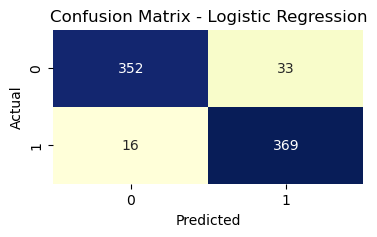

In [64]:
# Define the parameter grid
param_grid = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# Create the Random Forest Classifier
RFC=RandomForestClassifier()

# Create the grid serch object
grid_search=GridSearchCV(RFC, param_grid, cv=5)

# Fit the grid search object
grid_search.fit(x_train, y_train)

# Get the best parameter and score
best_params=grid_search.best_params_
best_score=grid_search.best_score_

# Create the Random Forest classifier with the best parameters
best_RFC = RandomForestClassifier(**best_params)

# Fit the model on training data
best_RFC.fit(x_train, y_train)

# Make predictions on the test data
RFC_pred=best_RFC.predict(x_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RFC_pred))

# Cross-Validation Score
scores = cross_val_score(best_RFC, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RFC_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC SCORE

In [72]:
y_prob = best_RFC.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.5027255861022094


# ROC Curve

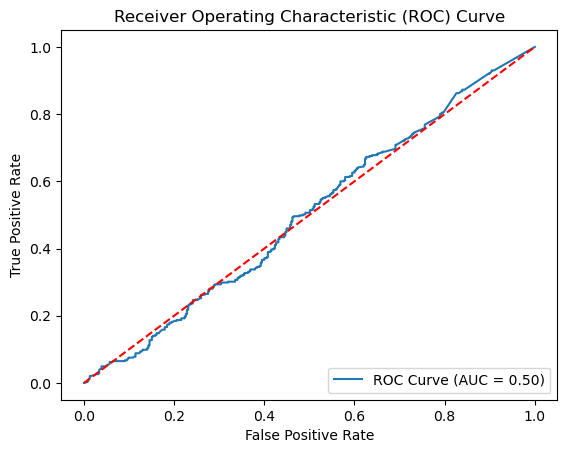

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression with Hyperparameter Tuning

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       385
           1       0.80      0.84      0.82       385

    accuracy                           0.82       770
   macro avg       0.82      0.82      0.82       770
weighted avg       0.82      0.82      0.82       770

Cross-Validation Scores: [0.86824324 0.85810811 0.90202703 0.85810811 0.88513514]
Mean Cross-Validation Score: 0.8743243243243242


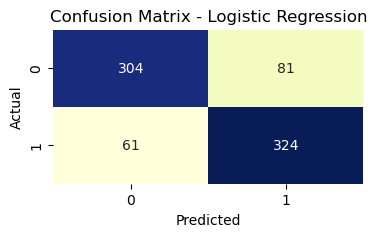

In [69]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(x_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(x_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC CURVE

In [67]:
from sklearn import metrics
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.5240613931523022


# ROC CURVE

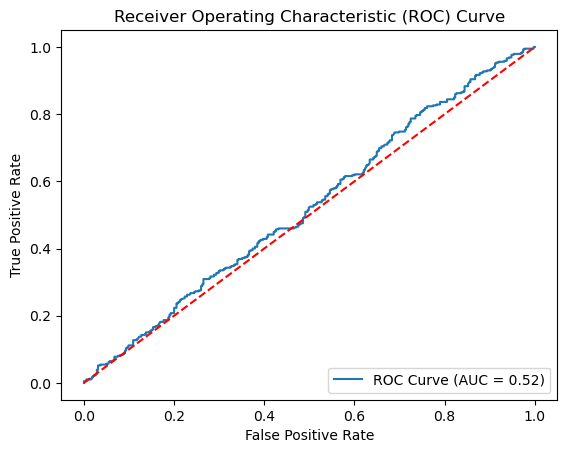

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier with Hyperparameter Tuning

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       385
           1       0.89      0.91      0.90       385

    accuracy                           0.90       770
   macro avg       0.90      0.90      0.90       770
weighted avg       0.90      0.90      0.90       770

Cross-Validation Scores: [0.88175676 0.76013514 0.86824324 0.77702703 0.80743243]
Mean Cross-Validation Score: 0.818918918918919


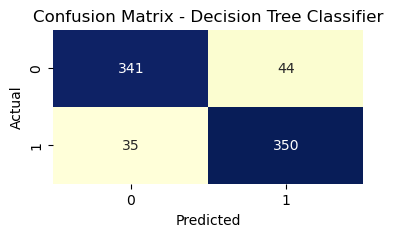

In [75]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(x_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(x_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC SCORE

In [76]:
y_prob = best_dt.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.8974025974025974


# ROC CURVE

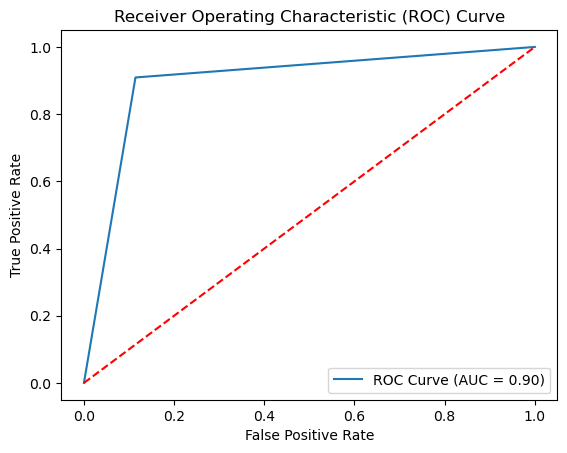

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# K Neighbour Classifier with Hyperparameter Tuning

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       385
           1       0.89      0.98      0.93       385

    accuracy                           0.93       770
   macro avg       0.93      0.93      0.93       770
weighted avg       0.93      0.93      0.93       770

Cross-Validation Scores: [0.89189189 0.83783784 0.83783784 0.7972973  0.85135135]
Mean Cross-Validation Score: 0.8432432432432432


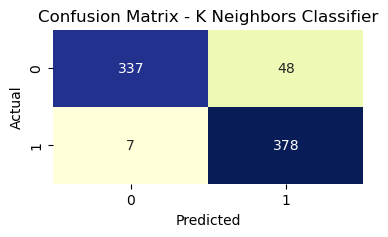

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(x_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(x_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC CURVE

In [79]:
y_prob = best_KN.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.9604992410187215


# ROC CURVE

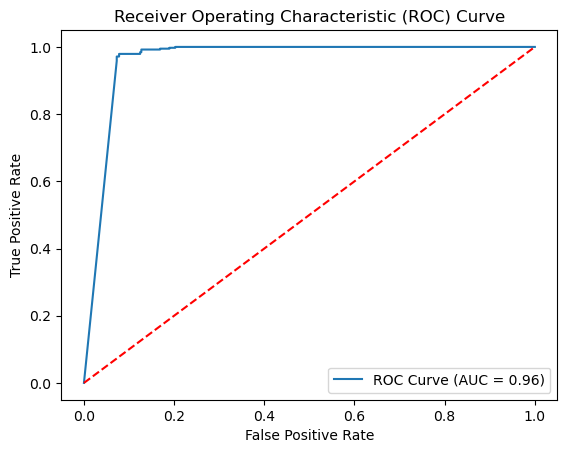

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Extra Tree Classifier with Hyperparameter Tuning

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       385
           1       0.93      0.97      0.95       385

    accuracy                           0.95       770
   macro avg       0.95      0.95      0.95       770
weighted avg       0.95      0.95      0.95       770

Cross-Validation Scores: [0.88175676 0.85472973 0.87162162 0.85472973 0.87837838]
Mean Cross-Validation Score: 0.8682432432432432


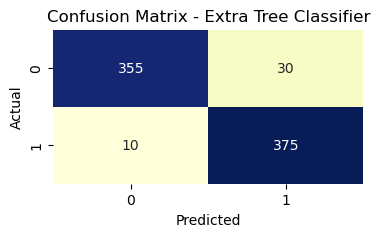

In [87]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(x_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(x_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC ROC CURVE

In [90]:
y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.5072794737729803


# ROC CURVE

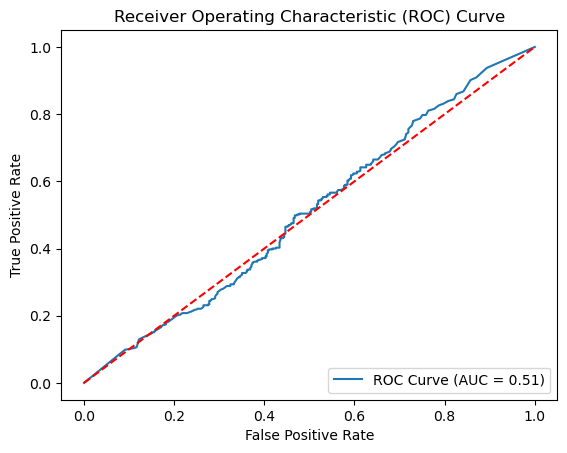

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Support Vector Classifier with Hyperparameter Tuning

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       385
           1       0.89      0.94      0.91       385

    accuracy                           0.91       770
   macro avg       0.91      0.91      0.91       770
weighted avg       0.91      0.91      0.91       770

Cross-Validation Scores: [0.89189189 0.84459459 0.86824324 0.84797297 0.88513514]
Mean Cross-Validation Score: 0.8675675675675676


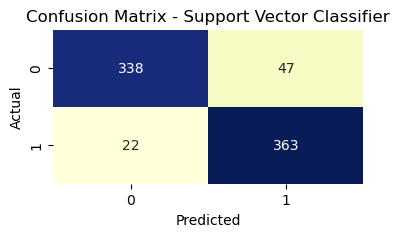

In [92]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(x_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(x_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC CURVE

In [93]:
y_prob = best_SV.decision_function(x_test)

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.957793894417271


# ROC CURVE

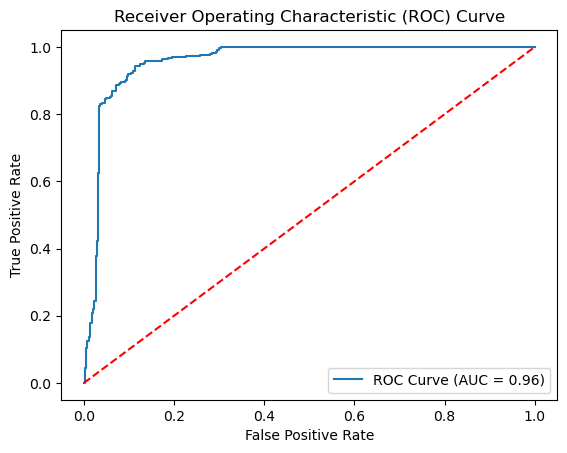

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# XGBoost Classifier with Hyperparameter Tuning

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       385
           1       0.50      0.50      0.50       385

    accuracy                           0.50       770
   macro avg       0.50      0.50      0.50       770
weighted avg       0.50      0.50      0.50       770

Cross-Validation Scores: [0.85233962 0.82071236 0.85615234 0.84277344 0.79199219]
Mean Cross-Validation Score: 0.8327939898389953


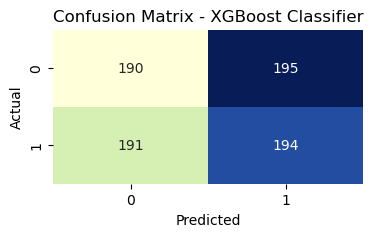

In [99]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(x_test)


print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC CURVE

In [100]:
y_prob = best_XGB.predict_proba(x_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.4811671445437679


# ROC CURVE

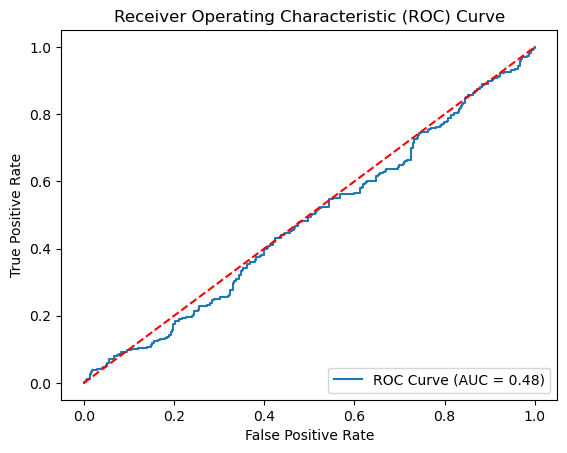

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Creating DataFrame of All the Models in Their descending Order

In [105]:
# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RFC, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RFC_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                  Model Name  Accuracy Score
1      Extra Tree Classifier        0.948052
2   Random Forest Classifier        0.936364
3     K Neighbour Classifier        0.928571
4  Support Vector Classifier        0.910390
5   Decision Tree Classifier        0.897403
6        Logistic Regression        0.815584
7         XGBoost Classifier        0.498701


Extra tree is working the best. So saving that model

In [108]:
filename = 'Extra_tree_classifier.pkl'
pickle.dump(ET, open(filename, 'wb'))